<a href="https://colab.research.google.com/github/Pallavih28/Gender_Image_Classification/blob/main/Gender_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imsave, imread, imshow
from glob import glob

In [7]:
!unzip /content/drive/MyDrive/Gender_Classification_Problem/Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5249.jpg         
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         

In [25]:
test_data = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/test_fkwGUNG.csv')

In [26]:
train = pd.read_csv('/content/drive/MyDrive/Gender_Classification_Problem/train.csv')

In [27]:
train.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [28]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [29]:
from keras.preprocessing import image

images = []
for img in train.image_names:
    img = image.load_img('images/' + img, target_size=(100, 100, 3))
    img = image.img_to_array(img)
    images.append(img)

images=np.array(images)

In [30]:
X = images/255
y = train['class']

In [31]:
X.shape, y.shape

((12196, 100, 100, 3), (12196,))

In [32]:
seed = 4
rng = np.random.RandomState(seed)

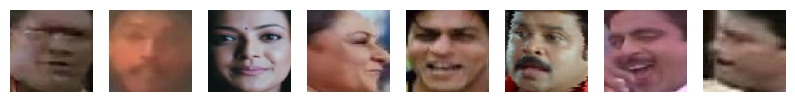

In [33]:
fig,ax = plt.subplots(nrows=1,ncols=8,figsize=(10,12))
for i in range(8):
  ax[i].imshow(X[i])
  ax[i].axis('off')

In [34]:
X.min(),X.max()

(0.0, 1.0)

2. Data Pre-processing

In [19]:
## Converting RGB format to 1D array
#X = X.reshape(X.shape[0],100*100*3)

In [35]:
X.shape

(12196, 100, 100, 3)

3. Train and Validation Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_valid, y_train,y_valid = train_test_split(X,y,random_state=seed,stratify=y,test_size=0.3)

In [38]:
X_train.shape, X_valid.shape, y_train.shape,y_valid.shape

((8537, 100, 100, 3), (3659, 100, 100, 3), (8537,), (3659,))

4. Model Architect

In [39]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, BatchNormalization, Flatten, Conv2D
from keras.optimizers import Adam
from keras.initializers import random_normal, glorot_normal, he_normal

In [40]:
model = Sequential()

In [41]:
model.add(InputLayer(input_shape=(100,100,3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=800,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=500,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=250,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 25)        1900      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 50)        31300     
                                                                 
 flatten (Flatten)           (None, 423200)            0         
                                                                 
 dense (Dense)               (None, 800)               338560800 
                                                                 
 batch_normalization (Batch  (None, 800)               3200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 500)               400500    
                                                        

5. Compile the Model

In [43]:
adam = Adam(lr=1e-5, clipvalue=1)

In [44]:
### Complile the Model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [45]:
from keras.callbacks import EarlyStopping

In [46]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0.01,patience=10,mode='min')

6. Fit the Model

In [47]:
### Fit the Model
model_history = model.fit(X,y,epochs=80,batch_size=150,validation_data=(X_valid,y_valid),callbacks=early_stopping)

Epoch 1/80
82/82 [==============================] - 38s 318ms/step - loss: 0.5069 - accuracy: 0.7605 - val_loss: 0.5789 - val_accuracy: 0.7234
Epoch 2/80
82/82 [==============================] - 24s 294ms/step - loss: 0.3960 - accuracy: 0.8226 - val_loss: 0.4486 - val_accuracy: 0.7923
Epoch 3/80
82/82 [==============================] - 24s 290ms/step - loss: 0.3395 - accuracy: 0.8520 - val_loss: 0.5895 - val_accuracy: 0.6947
Epoch 4/80
82/82 [==============================] - 23s 277ms/step - loss: 0.3032 - accuracy: 0.8684 - val_loss: 0.5747 - val_accuracy: 0.7059
Epoch 5/80
82/82 [==============================] - 24s 290ms/step - loss: 0.2681 - accuracy: 0.8872 - val_loss: 0.8370 - val_accuracy: 0.6136
Epoch 6/80
82/82 [==============================] - 23s 277ms/step - loss: 0.2410 - accuracy: 0.8988 - val_loss: 0.7239 - val_accuracy: 0.6843
Epoch 7/80
82/82 [==============================] - 23s 275ms/step - loss: 0.2036 - accuracy: 0.9170 - val_loss: 0.4023 - val_accuracy: 0.8363

7. Evaluate Model

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
prediction = model.predict(X_valid)
prediction = prediction.reshape(y_valid.shape[0],)
# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on validation set:', np.round(accuracy_score(y_valid, prediction_int),3), '%')

115/115 [==============================] - 2s 14ms/step
Accuracy on validation set: 0.987 %


In [50]:
train_prediction = model.predict(X_train)
train_prediction = train_prediction.reshape(y_train.shape[0],)
# converting probabilities to classes
train_prediction_int = train_prediction >= 0.5
train_prediction_int = train_prediction_int.astype('int64')
# accuracy on validation set
print('Accuracy on Training set:', np.round(accuracy_score(y_train, train_prediction_int),3), '%')

267/267 [==============================] - 4s 15ms/step
Accuracy on Training set: 0.987 %


Text(0, 0.5, 'accuracy')

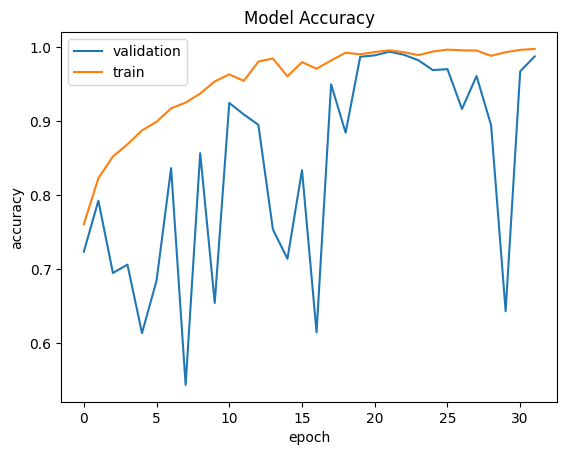

In [51]:
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('Model Accuracy')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

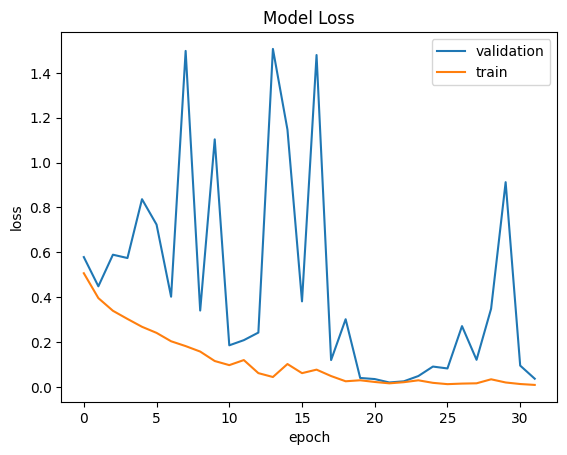

In [52]:
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.title('Model Loss')
plt.legend(['validation','train'])
plt.xlabel('epoch')
plt.ylabel('loss')

In the above case model is not overfitting yet so early stopping isn't right method of perfromance improvement. We can use methods to increase conversion speed of the model such as drop_out , BatchNormalization